![](figures/def_4.png)
[Source](https://openreview.net/forum?id=r1eBeyHFDH)

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#### Dataset Distribution
- Let us assume we have $J$ data samples and each sample includes $I$ features.
- Let us consider a synthetic dataset of pairs $(X^j \in \mathbb{R}^N,y^j \in \mathbb{N})$.
- Let us assume each $x^j_i \in \mathbb{R}$ comes from a normal distribution of the form $\mathcal{N}(\mu^j, \sigma^j)$

In [2]:
def get_dataset(mus, sigmas, features, samples):
    X = np.array([[np.random.normal(mu, sigma, features) for _ in range(samples)] 
                  for mu, sigma in zip(mus, sigmas)]).reshape(samples*len(mus),features)
    Y = np.array([[mu]*samples for mu in mus]).reshape(samples*len(mus))
    return X, Y.astype(int)

In [3]:
mus = [0, 1, 2, 3]
sigmas = [.25, .75, .25, .75]
features = 8
samples_per_class = 12

X, Y = get_dataset(mus, sigmas, features, samples_per_class)
print("Dataset:", X.shape, Y.shape)

Dataset: (48, 8) (48,)


In [4]:
print("Sample Data:",X[20], "\n Label:", Y[20])

Sample Data: [0.33660308 1.16815777 1.33699732 1.16239629 1.80661401 1.11993671
 2.21722742 1.71186323] 
 Label: 1


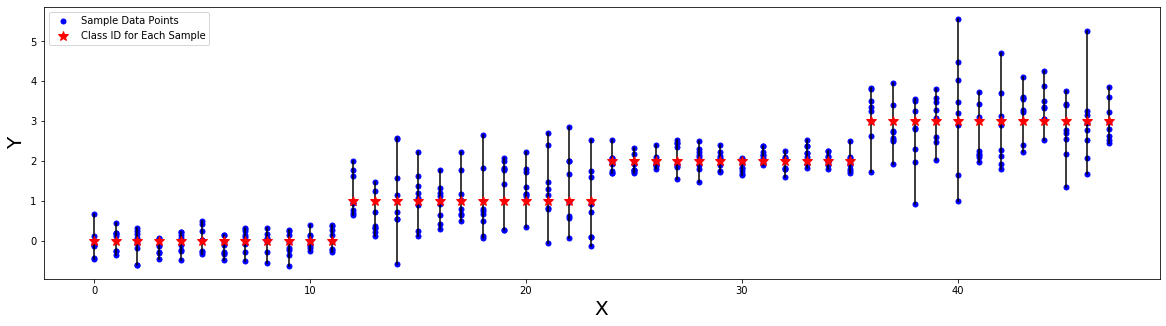

In [5]:


plt.figure(figsize=(20,5))
for i in range(features):
    if i == 0:
        plt.plot(X[:,i], "bo", markersize=5, label = "Sample Data Points")
    else:
        plt.plot(X[:,i], "bo", markersize=5)
plt.plot((range(len(X)),range(len(X))),(X.min(1), X.max(1)),c='black')
plt.plot(Y, "r*", label= "Class ID for Each Sample", markersize=10)

plt.xlabel("X",size =20)
plt.ylabel("Y",size =20)
plt.legend()

In [6]:
def get_best_estimation_of_probability(Y):
    ## Uniform prior
    _u, _l = np.unique(Y, return_inverse=True)    
    return np.histogram(_l, bins=np.arange(_u.size+1))[0][_l] / _l.size

def get_best_estimation_of_conditional_probability(X,Y):
    ## We assume having a sample data point, we can use its mean and std 
    ## as the emperical parameters to calcualte probability of each label.
    return np.array([norm(loc=X[i].mean(), scale=X[i].std()).pdf(np.unique(Y))[Y[i]] for i in range(X.shape[0])])

def get_v_entropy(Y):
    f_null_Y = get_best_estimation_of_probability(Y)
    log_value = -np.log(f_null_Y)
    inf_value = log_value.sum()/len(Y)
    return inf_value

def get_cond_v_entropy(X, Y):
    f_X_Y = get_best_estimation_of_conditional_probability(X,Y)
    log_value = -np.log(f_X_Y)
    inf_value = log_value.sum()/len(Y)
    return inf_value

In [7]:

v_entropy = get_v_entropy(Y)
print("First Term: ",v_entropy)

cond_v_entropy = get_cond_v_entropy(X, Y)
print("Second Term: ", cond_v_entropy)

print("v_information (X, Y; dataset):", v_entropy - cond_v_entropy)

First Term:  1.3862943611198906
Second Term:  0.09837803998214038
v_information (X, Y; dataset): 1.2879163211377502


* About `get_best_estimation_of_probability`.
    - We assume that when there is no input, then we use our prior knowledge, which here is uniform. Similar to what you said, we assume empirical histogram of the labels shows the prior

* About `get_best_estimation_of_conditional_probability`.
    - We assume that we know that data are coming from a normal distribution, but we don't know mean and variance of the data.
    - X is coming from a Gaussian distribution and Y is the mean of the Gaussian distribution that generates data.
    - We assume  the predictive family  is all the Gaussian distributions that can be used to predict the Y.
    - So,  We use the empirical mean and variance of the current sample to calculate the probability for each label.